### Aplicación kmeans

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Cargar el archivo CSV subido
df = pd.read_csv("housing.csv")

# Solo quedate con longitud, latitud y precio 
df = df[['median_house_value', 'latitude', 'longitude']]


### Crae al pipeline y haz fit 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3))
])

pipeline.fit(df)


Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3))])

pipeline.named_steps['kmeans'].labels_


In [5]:
# Obten los clusters

df['cluster'] = pipeline.predict(df)

Text(0, 0.5, 'Latitude')

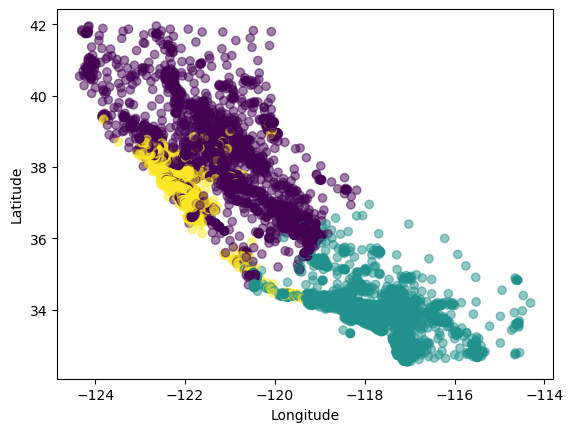

In [25]:
# Graficar

plt.scatter(df.longitude, df.latitude, c = df.cluster, alpha = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### ¿Cuantos clusters escoger?

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos: ya filtrados en df
X = df[['median_house_value', 'latitude', 'longitude']]


# Guarda la varianza del cluster o "inertia"
inertias = []

# ¿Cuantos clusters probar?
K_range = range(1, 11)

for i in K_range:
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=i))
    ])
    pipeline.fit(X)
    inertias.append(pipeline.named_steps['kmeans'].inertia_)


# Gráfica del codo


Text(0, 0.5, 'Loss Function')

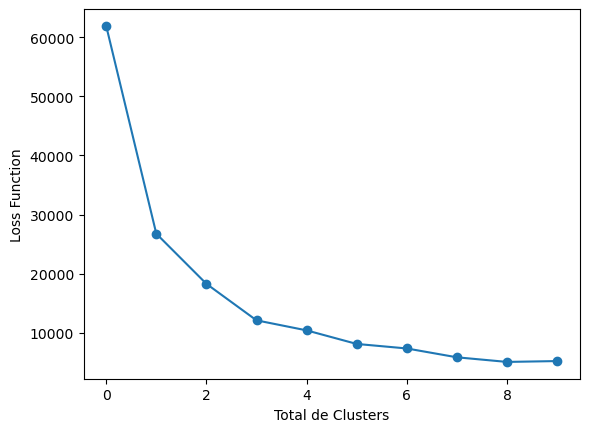

In [41]:
plt.plot(inertias, marker = "o")
plt.xlabel("Total de Clusters")
plt.ylabel("Loss Function")